# Dependencies and Setup

In [61]:
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
%matplotlib inline

In [62]:
# Read from csv 
drug_related_deaths_df = pd.read_csv('../Datasets//Accidental_Drug_Related_Deaths_2012-2018.csv')

In [63]:
# Removing unnecessary columns
narrowed_df = drug_related_deaths_df.loc[:,['ID','Date','Age','Sex','Race','DeathCity','DeathCityGeo','COD','Heroin','Cocaine','Fentanyl','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','Other','OpiateNOS','AnyOpioid']]

# Drop records without Age, Sex and Race entry
narrowed_df = narrowed_df.dropna(subset=['Age', 'Sex','Race'], how='all')

# Fill Nan values by N
narrowed_df.update(narrowed_df[['Heroin','Cocaine','Fentanyl','FentanylAnalogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','Other','OpiateNOS','AnyOpioid']].fillna('N'))

# Convert date column to Datetime object
narrowed_df['Date'] = pd.to_datetime(narrowed_df['Date'])
narrowed_df

,ID,Date,Age,Sex,Race,DeathCity,DeathCityGeo,COD,Heroin,Cocaine,...,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
1,13-0102,2013-03-21,48.0,Male,Black,NORWALK,"Norwalk, CT\n(41.11805, -73.412906)",Cocaine Intoxication,N,Y,...,N,N,N,N,N,N,N,N,N,N
2,16-0165,2016-03-13,30.0,Female,White,DANBURY,"Danbury, CT\n(41.393666, -73.451539)",Acute Heroin and Cocaine Intoxication,Y,Y,...,N,N,N,N,N,N,N,N,N,Y
3,16-0208,2016-03-31,23.0,Male,White,GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Acute Fentanyl and Morphine Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,Y
4,13-0052,2013-02-13,22.0,Male,"Asian, Other",GREENWICH,"Greenwich, CT\n(41.026526, -73.628549)",Fentanyl Intoxication,N,N,...,N,N,N,N,N,N,N,N,N,N
5,14-0277,2014-06-29,23.0,Male,White,BRISTOL,"BRISTOL, CT\n(41.673037, -72.945791)",Heroin Intoxication,Y,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,2015-09-08,43.0,Male,White,CHESHIRE,"CHESHIRE, CT\n(41.498834, -72.901448)",Acute Intoxication due to the Combined Effects...,N,N,...,N,Y,N,N,N,N,N,N,N,N
5101,17-0618,2017-07-22,21.0,Male,White,NEW HAVEN,"New Haven, CT\n(41.308252, -72.924161)","Multidrug Toxicity Including Heroin, Alprazola...",Y,N,...,N,Y,N,N,N,N,N,N,N,N
5102,18-0646,2018-08-14,30.0,Male,White,DANBURY,"DANBURY, CT\n(41.393666, -73.451539)","Multidrug Toxicity Including Heroin, Fentanyl,...",Y,N,...,N,N,N,N,Y,N,N,N,N,Y
5103,14-0124,2014-03-16,33.0,Male,White,WINDSOR,"WINDSOR, CT\n(41.852781, -72.64379)",Acute Fentanyl intoxication,N,N,...,N,N,N,N,N,N,N,N,N,N


In [64]:
# Get count of deaths in each month
narrowed_df.index = pd.to_datetime(narrowed_df['Date'],format='%m/%d/%y %I:%M%p')
narrowed_df = narrowed_df.groupby(by=[narrowed_df.index.year,narrowed_df.index.month]).agg({'ID':'count'})
narrowed_df.head(20)

ID
Date   Date    
2012.0 1.0   31
       2.0   27
       3.0   24
       4.0   30
       5.0   28
       6.0   28
       7.0   29
       8.0   31
       9.0   27
       10.0  36
       11.0  27
       12.0  37
2013.0 1.0   35
       2.0   38
       3.0   42
       4.0   33
       5.0   27
       6.0   44
       7.0   37
       8.0   37

In [65]:
# Create new dataframe with year,month and day concatenated
reduced_df = pd.DataFrame(columns=['Month', 'Deaths Per Month'])
for index, row in narrowed_df.iterrows():
    year = int(index[0])
    month = int(index[1])
    day = 1
    count = row[0]
    
    converted_date = datetime(year,month,day)
    reduced_df = reduced_df.append({'Month': converted_date, 'Deaths Per Month': count}, ignore_index=True)  

In [66]:
# Set index as month to plot Deaths per month chart
reduced_df.set_index('Month', inplace=True)
reduced_df.head()

,Deaths Per Month
Month,
2012-01-01,31
2012-02-01,27
2012-03-01,24
2012-04-01,30
2012-05-01,28


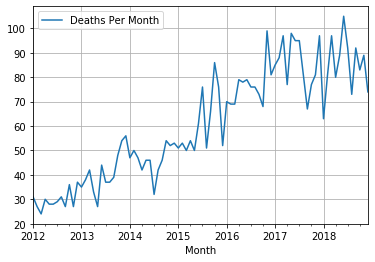

In [67]:

start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

reduced_df[(start_date <= reduced_df.index) & (reduced_df.index <= end_date)].plot(grid='on')

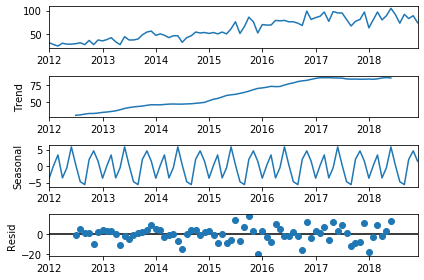

In [68]:
decomposition = sm.tsa.seasonal_decompose(reduced_df,model='additive')
fig = decomposition.plot()

In [15]:
def convertFloatColumnIntoDatetime(dataframe):
    print(dataframe)
    newDf = []
    for i in range(len(dataframe.values)):
        converted = convertValueIntoDatetime(dataframe.values[i])
        newDf.append(converted)

    return newDf

def convertValueIntoDatetime(row):
    converted = datetime(
        int(row[0]),
        int(row[1]),
        1
    )
    
print(convertFloatColumnIntoDatetime(narrowed_df))

             ID
Date   Date    
2012.0 1.0   31
       2.0   27
       3.0   24
       4.0   30
       5.0   28
...          ..
2018.0 8.0   73
       9.0   92
       10.0  83
       11.0  89
       12.0  74

[84 rows x 1 columns]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [29]:
narrowed_df.set_index('Date', inplace=True)
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

narrowed_df[(start_date <= narrowed_df.index) & (narrowed_df.index <= end_date)].plot(grid='on')

             ID
Date   Date    
2012.0 1.0   31
       2.0   27
       3.0   24
       4.0   30
       5.0   28
...          ..
2018.0 8.0   73
       9.0   92
       10.0  83
       11.0  89
       12.0  74

[84 rows x 1 columns]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [22]:
narrowed_df.head()

ID
Date   Date    
2012.0 1.0   31
       2.0   27
       3.0   24
       4.0   30
       5.0   28

In [24]:
start_date = datetime(2012,1,1)
end_date = datetime(2018,12,1)

narrowed_df[(start_date <= narrowed_df.index) & (narrowed_df.index <= end_date)].plot(grid='on')
narrowed_df[(start_date <= narrowed_df.index) & (narrowed_df.index <= end_date)].plot(grid='on')
# decomposition = sm.tsa.seasonal_decompose(narrowed_df,model='additive')
# fig = decomposition.plot()

             ID
Date   Date    
2012.0 1.0   31
       2.0   27
       3.0   24
       4.0   30
       5.0   28
...          ..
2018.0 8.0   73
       9.0   92
       10.0  83
       11.0  89
       12.0  74

[84 rows x 1 columns]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [9]:
# Accidental deaths per month
narrowed_df['Month'] = pd.DatetimeIndex(narrowed_df['Date']).month

# Accidental deaths per month
narrowed_df = narrowed_df.groupby('Month').count()

narrowed_df.reset_index(level=0, inplace=True)
deaths_per_month = narrowed_df.loc[:,['Month', 'ID']]
deaths_per_month = deaths_per_month.rename(columns={"ID": "Deaths Per Month"})
deaths_per_month.head()


,Month,Deaths Per Month
0,1,12


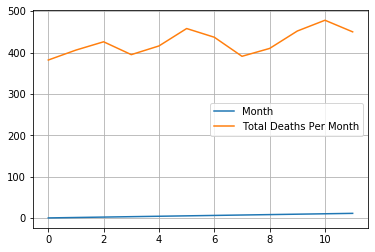

In [8]:
%matplotlib inline
deaths_per_month.plot(grid='on')